In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [120]:
new_file = '../data/Week1_challenge_data_source.csv'
df2 = pd.read_csv(new_file)

In [122]:
df2.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,04/04/2019 12:01,770.0,25/04/2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,09/04/2019 13:04,235.0,25/04/2019 08:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,09/04/2019 17:42,1.0,25/04/2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,10/04/2019 00:31,486.0,25/04/2019 07:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,12/04/2019 20:10,565.0,25/04/2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [123]:
df2.shape[0], df2.shape[1]

(150001, 55)

In [124]:
df2.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [125]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [126]:
import collections 

def handset_manufacturer(df):
    # 
    manufacturer_list = df['Handset Manufacturer'].tolist()
    occurence =  collections.Counter(manufacturer_list)
    #
    top_mobiles = pd.DataFrame.from_dict(occurence, orient ='index').reset_index()
    return top_mobiles.sort_values(0, ascending = False)

print()
handset_manufacturer(df2)

,index,0
3,Apple,59565
0,Samsung,40839
2,Huawei,34423
1,undefined,8987
25,Sony Mobile Communications Ab,980
...,...,...
137,Pt. Arga Mas Lestari,1
33,Shenzhen Chainway Information Technology Co Ltd,1
140,Vastking Technology (Hk) Limited,1
141,Mobiwire Sas,1


In [127]:
def handset_type(df):
    # 
    manufacturer_list = df['Handset Type'].tolist()
    occurence =  collections.Counter(manufacturer_list)
    #
    top_mobiles = pd.DataFrame.from_dict(occurence, orient ='index').reset_index()
    return top_mobiles.sort_values(0, ascending = False)

handset_type(df2)

,index,0
19,Huawei B528S-23A,19752
11,Apple iPhone 6S (A1688),9419
29,Apple iPhone 6 (A1586),9023
3,undefined,8987
25,Apple iPhone 7 (A1778),6326
...,...,...
903,Tct Mobile Suzho. Alcatel One Touch Y580D,1
904,Shenzhen Fortune. M-Ppas6,1
905,Wiko Global Sasu Wiko Ridge 4G,1
906,Hongkong Ipro Te. Ipro I9350 I9400 S3 Wave 3.5...,1


In [128]:
df2['Bearer Id'].unique()

array([1.31145e+19, 1.30424e+19, 7.27783e+18, 7.34988e+18, 1.26821e+19,
       6.91754e+18,         nan, 1.31865e+19, 7.42194e+18, 7.56606e+18])

In [129]:
df2.sort_values(by = ['Handset Type'],
        ascending=[True]).head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
22915,1.304240e+19,24/04/2019 20:40,420.0,25/04/2019 00:01,627.0,12063.0,2.082020e+14,3.377002e+10,3.523530e+13,T73680B,...,17374335.0,6877932.0,7988067.0,12427656.0,600724410.0,16082125.0,75565047.0,3496126.0,43306267.0,632017382.0
24538,6.917540e+18,24/04/2019 20:59,908.0,25/04/2019 01:58,147.0,17944.0,2.082100e+14,3.366728e+10,3.527410e+13,U11850B,...,2751984.0,15442233.0,11115039.0,15905321.0,808982512.0,10063015.0,526409751.0,7304072.0,49380109.0,829391055.0
83394,6.917540e+18,27/04/2019 10:27,402.0,28/04/2019 00:34,169.0,50819.0,2.082000e+14,3.364106e+10,3.574820e+13,G14038A,...,22050742.0,16395992.0,17912540.0,186123.0,758495114.0,12779284.0,469053998.0,11369112.0,43136379.0,812493662.0
98614,1.304240e+19,27/04/2019 17:10,126.0,28/04/2019 01:36,683.0,30359.0,2.082010e+14,3.362357e+10,3.580700e+13,L74554A,...,5958109.0,10880189.0,12021110.0,20510754.0,186180827.0,365321.0,427912779.0,3830423.0,38909548.0,214380242.0
24450,1.304240e+19,24/04/2019 20:58,423.0,25/04/2019 00:01,89.0,10993.0,2.082000e+14,3.367833e+10,3.580710e+13,D73548C,...,17339896.0,4941266.0,6489989.0,5126767.0,70999119.0,1692337.0,184245388.0,5520899.0,17641491.0,104992008.0


In [294]:
def aggregate_per_id(df):

    columns_to_show = ['Dur. (ms)', 'Total UL (Bytes)', 
                   'Total DL (Bytes)']

    return df.groupby(['Bearer Id'])[columns_to_show].agg([np.mean, np.min, 
                                            np.max])

aggregate_per_id(df2)

Dur. (ms)                      Total UL (Bytes)              \
                       mean      amin       amax             mean        amin   
Bearer Id                                                                       
6.917540e+18   59200.758240    7146.0   355758.0     4.130933e+07   5921981.0   
7.277830e+18   75667.617420    7284.0  1328732.0     4.125749e+07   5461287.0   
7.349880e+18  133635.315821    8949.0  1573420.0     4.108827e+07   2866892.0   
7.421940e+18   67042.989691   12103.0   301616.0     4.107144e+07  10210682.0   
7.566060e+18  153399.000000  153399.0   153399.0     5.890703e+07  58907032.0   
1.268210e+19   33674.717846    7364.0   243646.0     4.096270e+07   7934749.0   
1.304240e+19   80639.069018    7142.0  1859336.0     4.108569e+07   4338786.0   
1.311450e+19  132829.813892    7697.0  1859327.0     4.105602e+07   6243519.0   
1.318650e+19   67987.000000   10954.0   255505.0     4.244523e+07  13884525.0   

                         Total DL (Bytes)                           
                    amax             mean        amin         amax  
Bearer Id                                                           
6.917540e+18  73936462.0     4.544635e+08  14194498.0  891643520.0  
7.277830e+18  77458132.0     4.547874e+08   9046209.0  899502184.0  
7.349880e+18  77157382.0     4.544351e+08   8827082.0  902969616.0  
7.421940e+18  68552172.0     4.673357e+08  64413845.0  895681761.0  
7.566060e+18  58907032.0     8.131301e+07  81313010.0   81313010.0  
1.268210e+19  71093966.0     4.684946e+08  17697045.0  889115655.0  
1.304240e+19  78331311.0     4.533535e+08   7114041.0  899212554.0  
1.311450e+19  77390291.0     4.560214e+08   9199518.0  894503152.0  
1.318650e+19  64738232.0     4.127670e+08  31181078.0  872688792.0

In [297]:
df2['Bearer Id'].unique()

array([1.31145e+19, 1.30424e+19, 7.27783e+18, 7.34988e+18, 1.26821e+19,
       6.91754e+18,         nan, 1.31865e+19, 7.42194e+18, 7.56606e+18])

Handling Missing Values

In [131]:
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The Telecom Data contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(df2)

The Telecom Data contains 12.5 % missing values.


In [132]:
df2.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [133]:
# drop columns with more than 30% missing values
clean_df = df2.drop(['Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 
                    'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B',
                   'Nb of sec with 6250B < Vol UL < 37500B','Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
                   'Dur. (ms).1', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)'], axis=1)
clean_df.shape

(150001, 44)

In [134]:
clean_df.isna().sum()

Bearer Id                           991
Start                                 1
Start ms                              1
End                                   1
End ms                                1
Dur. (ms)                             1
IMSI                                570
MSISDN/Number                      1066
IMEI                                572
Last Location Name                 1153
Avg RTT DL (ms)                   27829
Avg RTT UL (ms)                   27812
Avg Bearer TP DL (kbps)               1
Avg Bearer TP UL (kbps)               1
TCP DL Retrans. Vol (Bytes)       88146
TCP UL Retrans. Vol (Bytes)       96649
DL TP < 50 Kbps (%)                 754
50 Kbps < DL TP < 250 Kbps (%)      754
250 Kbps < DL TP < 1 Mbps (%)       754
DL TP > 1 Mbps (%)                  754
UL TP < 10 Kbps (%)                 792
10 Kbps < UL TP < 50 Kbps (%)       792
50 Kbps < UL TP < 300 Kbps (%)      792
UL TP > 300 Kbps (%)                792
Activity Duration DL (ms)             1


In [135]:
clean_df.skew(axis = 0, skipna = True)

Bearer Id                           0.026667
Start ms                            0.000968
End ms                             -0.001163
Dur. (ms)                           3.952609
IMSI                               40.992855
MSISDN/Number                     332.155855
IMEI                                1.071470
Avg RTT DL (ms)                    62.907828
Avg RTT UL (ms)                    28.457415
Avg Bearer TP DL (kbps)             2.589437
Avg Bearer TP UL (kbps)             4.503413
TCP DL Retrans. Vol (Bytes)        15.951809
TCP UL Retrans. Vol (Bytes)        84.113393
DL TP < 50 Kbps (%)                -2.297803
50 Kbps < DL TP < 250 Kbps (%)      3.271453
250 Kbps < DL TP < 1 Mbps (%)       4.566158
DL TP > 1 Mbps (%)                  5.370351
UL TP < 10 Kbps (%)                -8.985016
10 Kbps < UL TP < 50 Kbps (%)      10.943888
50 Kbps < UL TP < 300 Kbps (%)     21.878495
UL TP > 300 Kbps (%)               36.174053
Activity Duration DL (ms)           5.872256
Activity D

In [136]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 44 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       149010 non-null  float64
 1   Start                           150000 non-null  object 
 2   Start ms                        150000 non-null  float64
 3   End                             150000 non-null  object 
 4   End ms                          150000 non-null  float64
 5   Dur. (ms)                       150000 non-null  float64
 6   IMSI                            149431 non-null  float64
 7   MSISDN/Number                   148935 non-null  float64
 8   IMEI                            149429 non-null  float64
 9   Last Location Name              148848 non-null  object 
 10  Avg RTT DL (ms)                 122172 non-null  float64
 11  Avg RTT UL (ms)                 122189 non-null  float64
 12  Avg Bearer TP DL

In [137]:
clean_df['Start'] = clean_df['Start'].fillna(clean_df['Start'].mode()[0])
clean_df['End'] = clean_df['End'].fillna(clean_df['End'].mode()[0])
clean_df['Last Location Name'] = clean_df['Last Location Name'].fillna(clean_df['Last Location Name'].mode()[0])
clean_df['Handset Manufacturer'] = clean_df['Handset Manufacturer'].fillna(clean_df['Handset Manufacturer'].mode()[0])
clean_df['Handset Type'] = clean_df['Handset Type'].fillna(clean_df['Handset Type'].mode()[0])

In [138]:
cleaned_df = clean_df.drop(['Start', 'End', 'Last Location Name', 'Handset Type', 'Handset Manufacturer'], axis=1)

In [139]:
from sklearn.impute import SimpleImputer
    
imputer = SimpleImputer(strategy='mean')
imputer.fit(cleaned_df)
    
X = imputer.transform(cleaned_df)
df_clean = pd.DataFrame(X, columns = cleaned_df.columns)

In [140]:
data_describe

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Activity Duration UL (ms),Social Media (Bytes),Google Data (Bytes),Email Data (Bytes),Youtube Data (Bytes),Netflix Data (Bytes),Gaming data (Bytes),Other Data (Bytes),Total Data (Bytes),Decile_rank
count,1.500010e+05,150001.000000,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,150001.000000,150001.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082017e+14,4.188282e+10,4.847454e+13,109.795706,17.662883,13300.045927,...,1.408880e+06,1.828250e+06,7.807295e+06,2.259102e+06,2.264348e+07,2.262861e+07,4.303331e+08,4.293653e+08,4.957646e+08,1.881961
std,2.883597e+18,288.610872,288.096693,8.103735e+04,2.145201e+10,2.438731e+12,2.237359e+13,559.342620,76.529933,23971.798635,...,4.643215e+06,1.035646e+06,3.516420e+06,1.071109e+06,9.246800e+06,9.260820e+06,2.440199e+08,2.432681e+08,2.443810e+08,1.450554
min,6.917540e+18,0.000000,0.000000,7.142000e+03,2.040470e+14,3.360100e+10,4.400150e+11,0.000000,0.000000,0.000000,...,0.000000e+00,1.563000e+03,4.033000e+04,8.359000e+03,7.890300e+04,9.843200e+04,3.063580e+05,1.490450e+05,2.895611e+07,0.000000
25%,7.349880e+18,250.000000,251.000000,5.744200e+04,2.082010e+14,3.365151e+10,3.546260e+13,35.000000,3.000000,43.000000,...,2.154000e+04,9.322180e+05,4.943599e+06,1.359344e+06,1.599846e+07,1.597946e+07,2.187279e+08,2.185534e+08,2.844764e+08,1.000000
50%,7.349880e+18,499.000000,500.000000,8.639900e+04,2.082020e+14,3.366380e+10,3.572240e+13,54.000000,7.000000,63.000000,...,4.679400e+04,1.826471e+06,7.812835e+06,2.263567e+06,2.266177e+07,2.263554e+07,4.316150e+08,4.299865e+08,4.968610e+08,1.000000
75%,1.304240e+19,749.000000,750.000000,1.324300e+05,2.082020e+14,3.368473e+10,8.611970e+13,109.795706,17.662883,19710.000000,...,5.991140e+05,2.727487e+06,1.068280e+07,3.159818e+06,2.929260e+07,2.929044e+07,6.414159e+08,6.399275e+08,7.065054e+08,3.000000
max,1.318650e+19,999.000000,999.000000,1.859336e+06,2.140740e+14,8.823970e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,1.449113e+08,3.650861e+06,1.552878e+07,4.518036e+06,4.519008e+07,4.519815e+07,8.592028e+08,8.595209e+08,9.559848e+08,4.000000


In [141]:
data_describe = df_clean.describe()
db = data_describe.iloc[0:,23:31]
db

,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes)
count,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05
mean,1.795322e+06,32928.434380,5.750753e+06,2.056542e+06,1.791729e+06,467373.441940,1.163407e+07,1.100941e+07
std,1.035482e+06,19006.178256,3.309097e+06,1.189917e+06,1.035840e+06,269969.307031,6.710569e+06,6.345423e+06
min,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,1.050000e+02
25%,8.991480e+05,16448.000000,2.882393e+06,1.024279e+06,8.927930e+05,233383.000000,5.833501e+06,5.517965e+06
50%,1.794369e+06,32920.000000,5.765829e+06,2.054573e+06,1.793505e+06,466250.000000,1.161602e+07,1.101345e+07
75%,2.694938e+06,49334.000000,8.623552e+06,3.088454e+06,2.689327e+06,700440.000000,1.744852e+07,1.651556e+07
max,3.586064e+06,65870.000000,1.146283e+07,4.121357e+06,3.586146e+06,936418.000000,2.325910e+07,2.201196e+07


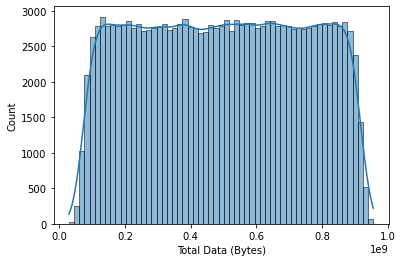

In [160]:
sns.histplot(data = df_clean, x = df_clean['Total Data (Bytes)'], kde=True)
plt.savefig('Total Data Distribution.png')

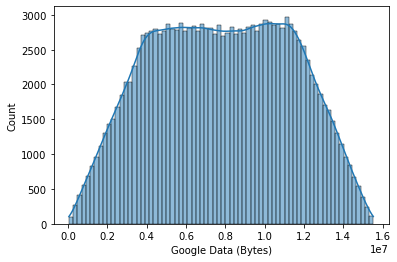

In [161]:
sns.histplot(data = df_clean, x = df_clean['Google Data (Bytes)'], kde=True)
plt.savefig('Google Data Distribution.png')

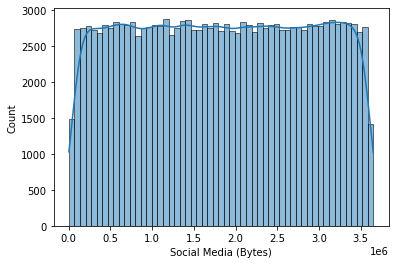

In [162]:
sns.histplot(data = df_clean, x = df_clean['Social Media (Bytes)'], kde=True)
plt.savefig('Social Media.png')

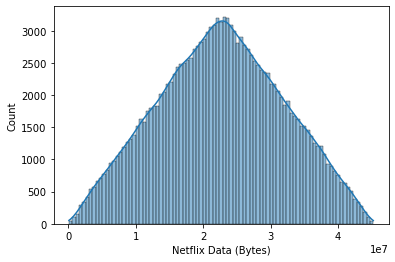

In [163]:
sns.histplot(data = df_clean, x = df_clean['Netflix Data (Bytes)'], kde=True)
plt.savefig('Netflix Distribution.png')

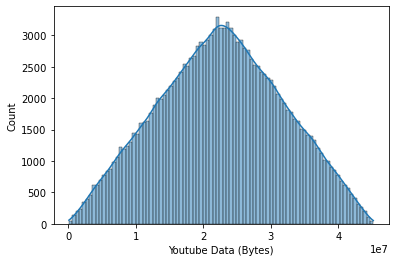

In [164]:
sns.histplot(data = df_clean, x = df_clean['Youtube Data (Bytes)'], kde=True)
plt.savefig('Youtube Distribution.png')

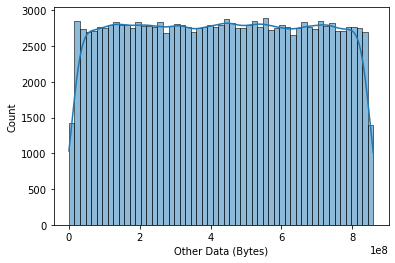

In [165]:
sns.histplot(data = df_clean, x = df_clean['Other Data (Bytes)'], kde=True)
plt.savefig('Other Data Distribution.png')

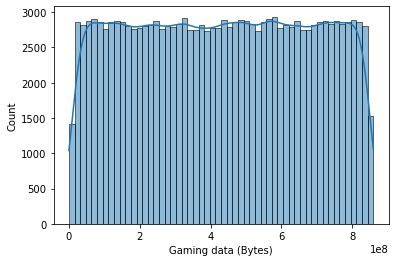

In [166]:
sns.histplot(data = df_clean, x = df_clean['Gaming data (Bytes)'], kde=True)
plt.savefig('Gaming Distribution.png')

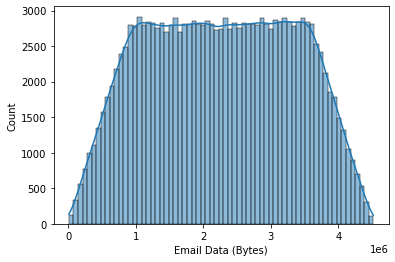

In [167]:
sns.histplot(data = df_clean, x = df_clean['Email Data (Bytes)'], kde=True)
plt.savefig('Email Distribution.png')

<AxesSubplot:ylabel='Social Media (Bytes)'>

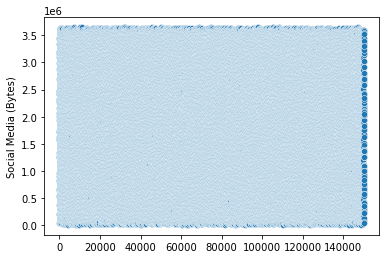

In [168]:
sns.scatterplot(x= df_clean.index, y = df_clean['Social Media (Bytes)'])

<AxesSubplot:ylabel='Total Data (Bytes)'>

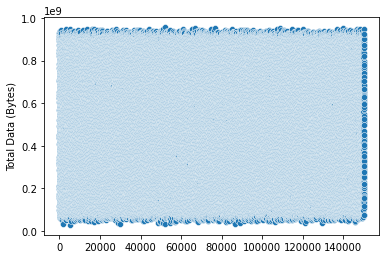

In [169]:
sns.scatterplot(x= df_clean.index, y = df_clean['Total Data (Bytes)'])
#Some certain kind of linearity in the data

<AxesSubplot:ylabel='Google Data (Bytes)'>

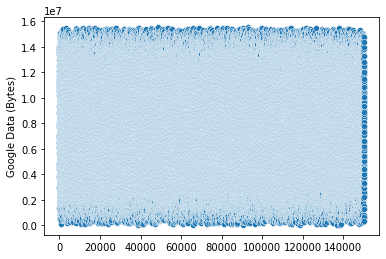

In [170]:
sns.scatterplot(x= df_clean.index, y = df_clean['Google Data (Bytes)'])

<AxesSubplot:ylabel='Avg RTT DL (ms)'>

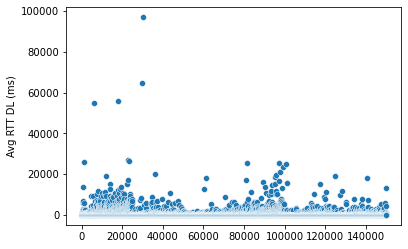

In [153]:
sns.scatterplot(x= df_clean.index, y = df_clean['Avg RTT DL (ms)'])

<AxesSubplot:ylabel='Activity Duration DL (ms)'>

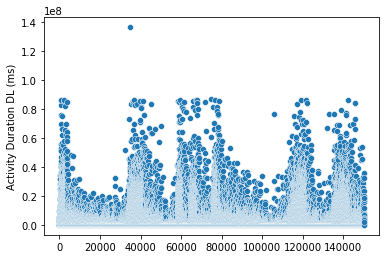

In [154]:
sns.scatterplot(x= df_clean.index, y = df_clean['Activity Duration DL (ms)'])

<AxesSubplot:ylabel='Avg RTT UL (ms)'>

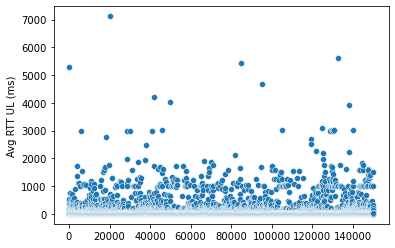

In [155]:
sns.scatterplot(x= df_clean.index, y = df_clean['Avg RTT UL (ms)'])

<AxesSubplot:ylabel='Activity Duration UL (ms)'>

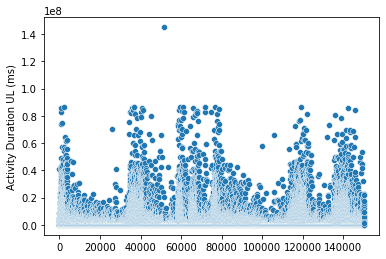

In [156]:
sns.scatterplot(x= df_clean.index, y = df_clean['Activity Duration UL (ms)'])

Bivariate Analysis

In [157]:
# Adding the columns together
def total_data(df):
    # Adding the columns together
    total_dl = np.array(df['Total DL (Bytes)'])
    total_ul = np.array(df['Total UL (Bytes)'])
    total_data = np.add(total_dl, total_ul)

    df['Total Data (Bytes)'] = total_data
    
def gaming_data(df):
    gaming_dl = np.array(df['Gaming DL (Bytes)'])
    gaming_ul = np.array(df['Gaming UL (Bytes)'])
    gaming_data = np.add(gaming_dl, gaming_ul)
    
    df['Gaming data (Bytes)'] = gaming_data
    
def social_data(df):
    social_dl = np.array(df['Social Media DL (Bytes)'])
    social_ul = np.array(df['Social Media UL (Bytes)'])
    social_data = np.add(social_dl, social_ul)
    
    df['Social Media (Bytes)'] = social_data
    
def google_data(df):
    google_dl = np.array(df['Google DL (Bytes)'])
    google_ul = np.array(df['Google UL (Bytes)'])
    google_data = np.add(google_dl, google_ul)
    
    df['Google Data (Bytes)'] = google_data
    
def youtube_data(df):
    youtube_dl = np.array(df['Youtube DL (Bytes)'])
    youtube_ul = np.array(df['Youtube UL (Bytes)'])
    youtube_data = np.add(youtube_dl, youtube_ul)
    
    df['Youtube Data (Bytes)'] = youtube_data
    
def email_data(df):
    email_dl = np.array(df['Email DL (Bytes)'])
    email_ul = np.array(df['Email UL (Bytes)'])
    email_data = np.add(email_dl, email_ul)
    
    df['Email Data (Bytes)'] = email_data
    
def netflix_data(df):
    netflix_dl = np.array(df['Netflix DL (Bytes)'])
    netflix_ul = np.array(df['Netflix UL (Bytes)'])
    netflix_data = np.add(netflix_dl, netflix_ul)
    
    df['Netflix Data (Bytes)'] = netflix_data
    
def other_data(df):
    other_dl = np.array(df['Other DL (Bytes)'])
    other_ul = np.array(df['Other UL (Bytes)'])
    other_data = np.add(other_dl, other_ul)
    
    df['Other Data (Bytes)'] = other_data

social_data(df_clean)
google_data(df_clean)
email_data(df_clean)
youtube_data(df_clean)
netflix_data(df_clean)
gaming_data(df_clean)
other_data(df_clean)
total_data(df_clean)

In [158]:
df_clean.columns

Index(['Bearer Id', 'Start ms', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number',
       'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
       'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)',
       '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
       'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
       '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
       'UL TP > 300 Kbps (%)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',
       'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)',
       'Social Media (Bytes)', 'Googl

In [258]:
df_clean = df_clean.drop(['Social Media UL (Bytes)', 'Social Media DL (Bytes)', 'Google DL (Bytes)', 
                         'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)','Youtube DL (Bytes)'
                         ,'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)','Gaming DL (Bytes)',
                         'Gaming UL (Bytes)', 'Other DL (Bytes)','Other UL (Bytes)','Total UL (Bytes)',
                         'Total DL (Bytes)'], axis = 1)

KeyError: "['Social Media UL (Bytes)' 'Social Media DL (Bytes)' 'Google DL (Bytes)'\n 'Google UL (Bytes)' 'Email DL (Bytes)' 'Email UL (Bytes)'\n 'Youtube DL (Bytes)' 'Youtube UL (Bytes)' 'Netflix DL (Bytes)'\n 'Netflix UL (Bytes)' 'Gaming DL (Bytes)' 'Gaming UL (Bytes)'\n 'Other DL (Bytes)' 'Other UL (Bytes)' 'Total UL (Bytes)'\n 'Total DL (Bytes)'] not found in axis"

In [172]:
df_clean

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Activity Duration DL (ms),Activity Duration UL (ms),Social Media (Bytes),Google Data (Bytes),Email Data (Bytes),Youtube Data (Bytes),Netflix Data (Bytes),Gaming data (Bytes),Other Data (Bytes),Total Data (Bytes)
0,1.311450e+19,770.0000,662.00000,1.823652e+06,2.082010e+14,3.366496e+10,3.552120e+13,42.000000,5.000000,23.000000,...,3.762400e+04,3.878700e+04,1.570185e+06,2.905912e+06,3.701304e+06,18355943.00,17855187.00,2.924265e+08,1.805588e+08,3.456294e+08
1,1.311450e+19,235.0000,606.00000,1.365104e+06,2.082020e+14,3.368185e+10,3.579400e+13,65.000000,5.000000,16.000000,...,1.680000e+02,3.560000e+03,1.933278e+06,4.414096e+06,9.373850e+05,39359124.00,35565545.00,6.099208e+08,5.419594e+08,7.071854e+08
2,1.311450e+19,1.0000,652.00000,1.361762e+06,2.082000e+14,3.376063e+10,3.528150e+13,109.795706,17.662883,6.000000,...,0.000000e+00,0.000000e+00,1.726277e+06,1.022912e+07,3.363124e+06,34425237.00,23751202.00,2.299803e+08,4.149084e+08,3.076910e+08
3,1.311450e+19,486.0000,171.00000,1.321509e+06,2.082010e+14,3.375034e+10,3.535660e+13,109.795706,17.662883,44.000000,...,3.330000e+03,3.788200e+04,6.574930e+05,1.181176e+07,2.070983e+06,36534765.00,15092588.00,8.103879e+08,7.618372e+08,8.893527e+08
4,1.311450e+19,565.0000,954.00000,1.089009e+06,2.082010e+14,3.369980e+10,3.540700e+13,109.795706,17.662883,6.000000,...,0.000000e+00,0.000000e+00,9.127880e+05,7.748843e+06,2.110349e+06,34222253.00,17539799.00,5.312370e+08,5.646198e+08,6.076814e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277830e+18,451.0000,214.00000,8.123000e+04,2.082020e+14,3.365069e+10,3.548310e+13,32.000000,0.000000,52.000000,...,4.237600e+04,4.191500e+04,3.517065e+06,1.278491e+07,6.908760e+05,27955095.00,37561864.00,5.358069e+08,1.675193e+07,6.318041e+08
149997,7.349880e+18,483.0000,187.00000,9.797000e+04,2.082020e+14,3.366345e+10,3.566050e+13,27.000000,2.000000,23.000000,...,1.726400e+04,1.675900e+04,2.352181e+06,4.415361e+06,2.121718e+06,22165518.00,40643294.00,6.316281e+08,7.146381e+08,7.057839e+08
149998,1.311450e+19,283.0000,810.00000,9.824900e+04,2.082020e+14,3.362189e+10,3.572120e+13,43.000000,6.000000,43.000000,...,2.500300e+04,2.864000e+04,1.260239e+06,6.585469e+06,2.058277e+06,24516413.00,15029702.00,5.669338e+08,1.324156e+08,6.276986e+08
149999,1.311450e+19,696.0000,327.00000,9.791000e+04,2.082020e+14,3.361962e+10,8.618620e+13,37.000000,5.000000,34.000000,...,1.340500e+04,3.408800e+04,8.231090e+05,7.757267e+06,2.850914e+06,17122508.00,16494842.00,3.550664e+08,8.161200e+08,4.015220e+08


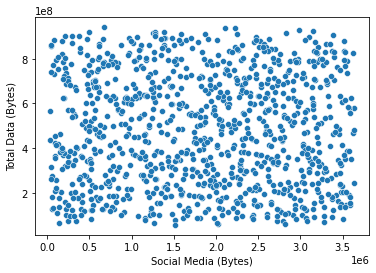

In [173]:
sns.scatterplot(x=df_clean.loc[0:1000, 'Social Media (Bytes)'], y=df_clean.loc[0:1000, 'Total Data (Bytes)']) 
plt.savefig('Social Correlation.png')

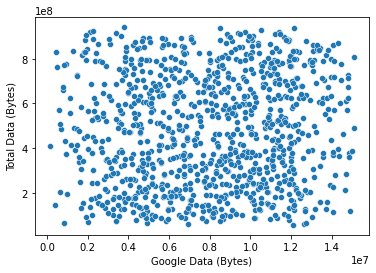

In [174]:
sns.scatterplot(x=df_clean.loc[0:1000, 'Google Data (Bytes)'], y=df_clean.loc[0:1000, 'Total Data (Bytes)'])
plt.savefig('Google Correlation.png')

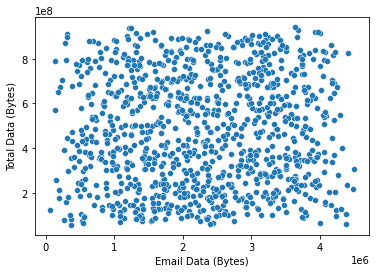

In [175]:
sns.scatterplot(x=df_clean.loc[0:1000, 'Email Data (Bytes)'], y=df_clean.loc[0:1000, 'Total Data (Bytes)'])
plt.savefig('Email Correlation.png')

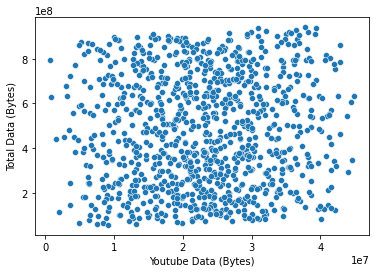

In [176]:
sns.scatterplot(x=df_clean.loc[0:1000, 'Youtube Data (Bytes)'], y=df_clean.loc[0:1000, 'Total Data (Bytes)'])
plt.savefig('Youtube Correlation.png')

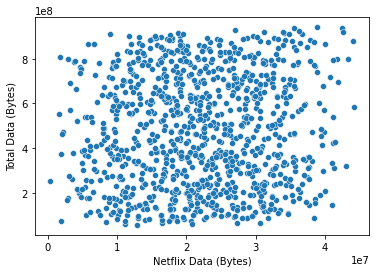

In [177]:
sns.scatterplot(x=df_clean.loc[0:1000, 'Netflix Data (Bytes)'], y=df_clean.loc[0:1000, 'Total Data (Bytes)'])
plt.savefig('Netflix Correlation.png')

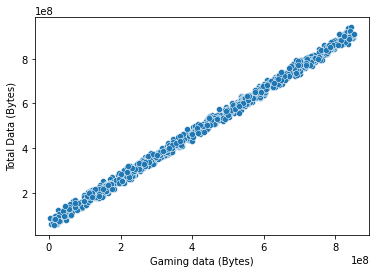

In [178]:
sns.scatterplot(x=df_clean.loc[0:1000, 'Gaming data (Bytes)'], y=df_clean.loc[0:1000, 'Total Data (Bytes)'])
plt.savefig('Gaming Correlation.png')

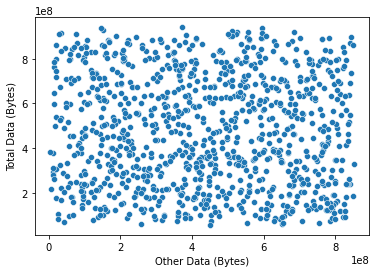

In [179]:
sns.scatterplot(x=df_clean.loc[0:1000, 'Other Data (Bytes)'], y=df_clean.loc[0:1000, 'Total Data (Bytes)'])
plt.savefig('Other Correlation.png')

In [180]:
df_clean.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Activity Duration DL (ms),Activity Duration UL (ms),Social Media (Bytes),Google Data (Bytes),Email Data (Bytes),Youtube Data (Bytes),Netflix Data (Bytes),Gaming data (Bytes),Other Data (Bytes),Total Data (Bytes)
count,1.500010e+05,150001.000000,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,150001.000000,150001.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082017e+14,4.188282e+10,4.847454e+13,109.795706,17.662883,13300.045927,...,1.829177e+06,1.408880e+06,1.828250e+06,7.807295e+06,2.259102e+06,2.264348e+07,2.262861e+07,4.303331e+08,4.293653e+08,4.957646e+08
std,2.883597e+18,288.610872,288.096693,8.103735e+04,2.145201e+10,2.438731e+12,2.237359e+13,559.342620,76.529933,23971.798635,...,5.696376e+06,4.643215e+06,1.035646e+06,3.516420e+06,1.071109e+06,9.246800e+06,9.260820e+06,2.440199e+08,2.432681e+08,2.443810e+08
min,6.917540e+18,0.000000,0.000000,7.142000e+03,2.040470e+14,3.360100e+10,4.400150e+11,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,1.563000e+03,4.033000e+04,8.359000e+03,7.890300e+04,9.843200e+04,3.063580e+05,1.490450e+05,2.895611e+07
25%,7.349880e+18,250.000000,251.000000,5.744200e+04,2.082010e+14,3.365151e+10,3.546260e+13,35.000000,3.000000,43.000000,...,1.487800e+04,2.154000e+04,9.322180e+05,4.943599e+06,1.359344e+06,1.599846e+07,1.597946e+07,2.187279e+08,2.185534e+08,2.844764e+08
50%,7.349880e+18,499.000000,500.000000,8.639900e+04,2.082020e+14,3.366380e+10,3.572240e+13,54.000000,7.000000,63.000000,...,3.930500e+04,4.679400e+04,1.826471e+06,7.812835e+06,2.263567e+06,2.266177e+07,2.263554e+07,4.316150e+08,4.299865e+08,4.968610e+08
75%,1.304240e+19,749.000000,750.000000,1.324300e+05,2.082020e+14,3.368473e+10,8.611970e+13,109.795706,17.662883,19710.000000,...,6.796110e+05,5.991140e+05,2.727487e+06,1.068280e+07,3.159818e+06,2.929260e+07,2.929044e+07,6.414159e+08,6.399275e+08,7.065054e+08
max,1.318650e+19,999.000000,999.000000,1.859336e+06,2.140740e+14,8.823970e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,1.365365e+08,1.449113e+08,3.650861e+06,1.552878e+07,4.518036e+06,4.519008e+07,4.519815e+07,8.592028e+08,8.595209e+08,9.559848e+08


In [181]:
#Decile Class
df_clean['Decile_rank'] = pd.qcut(df_clean['Dur. (ms)'], 5,
                            labels = False)

In [182]:
df_clean['Decile_rank'].unique()

array([4, 3, 2, 1, 0], dtype=int64)

In [183]:
def total_data_per_class(df):
    
    # Sum of total data for first class
    rank_first = df[df['Decile_rank'] == 0]
    total_data_first = sum(rank_first['Total Data (Bytes)'].tolist()) 
    
    # Sum of total data for second class
    rank_second = df[df['Decile_rank'] == 1]
    total_data_second = sum(rank_second['Total Data (Bytes)'].tolist()) 

    # Sum of total data for third class
    rank_third = df[df['Decile_rank'] == 3]
    total_data_third = sum(rank_third['Total Data (Bytes)'].tolist()) 
    
    # Sum of total data for fourth class
    rank_fourth = df[df['Decile_rank'] == 4]
    total_data_fourth = sum(rank_fourth['Total Data (Bytes)'].tolist()) 
    
    # Sum of total data for the fifth class
    rank_fifth = df[df['Decile_rank'] == 1]
    total_data_fifth = sum(rank_fifth['Total Data (Bytes)'].tolist()) 
    
    columns = [total_data_first, total_data_second, total_data_third, total_data_fourth, total_data_fifth]
    rows = ['1', '2', '3', '4', '5']
    
    return pd.DataFrame({'Class':rows, 'Total Data':columns})

In [184]:
total_data_per_class(df_clean)

,Class,Total Data
0,1,1.488404e+13
1,2,2.361997e+13
2,3,1.485375e+13
3,4,1.491834e+13
4,5,2.361997e+13


In [185]:
df_clean.columns

Index(['Bearer Id', 'Start ms', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number',
       'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
       'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)',
       '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
       'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
       '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
       'UL TP > 300 Kbps (%)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Social Media (Bytes)',
       'Google Data (Bytes)', 'Email Data (Bytes)', 'Youtube Data (Bytes)',
       'Netflix Data (Bytes)', 'Gaming data (Bytes)', 'Other Data (Bytes)',
       'Total Data (Bytes)', 'Decile_rank'],
      dtype='object')

In [186]:
corr_data = df_clean.loc[0:, 'Social Media (Bytes)':'Total Data (Bytes)']

In [188]:
def correlation_matrix(df):
    correlation = []
    # Calculate correlation of each column in the dataset against other columns 
    corr_matrix = df.corr()
    for column in corr_matrix:
        corr = corr_matrix[column].sort_values(ascending = False)
        correlation.append(corr)
        
    return pd.DataFrame(correlation)

correlation_matrix(corr_data)

,Social Media (Bytes),Other Data (Bytes),Total Data (Bytes),Email Data (Bytes),Gaming data (Bytes),Netflix Data (Bytes),Youtube Data (Bytes),Google Data (Bytes)
Social Media (Bytes),1.000000,0.006065,0.005383,0.004032,0.001082,0.001013,0.000548,-0.001708
Google Data (Bytes),-0.001708,-0.001727,0.013370,-0.000412,-0.000994,-0.001902,0.002277,1.000000
Email Data (Bytes),0.004032,-0.001299,0.003768,1.000000,-0.000644,0.001029,-0.002919,-0.000412
Youtube Data (Bytes),0.000548,0.002969,0.034888,-0.002919,-0.002999,0.002882,1.000000,0.002277
Netflix Data (Bytes),0.001013,-0.009033,0.034798,0.001029,-0.003109,1.000000,0.002882,-0.001902
Gaming data (Bytes),0.001082,-0.002661,0.998254,-0.000644,1.000000,-0.003109,-0.002999,-0.000994
Other Data (Bytes),0.006065,1.000000,-0.002443,-0.001299,-0.002661,-0.009033,0.002969,-0.001727
Total Data (Bytes),0.005383,-0.002443,1.000000,0.003768,0.998254,0.034798,0.034888,0.013370


Dimensionality Reduction

In [190]:
df_clean.columns

Index(['Bearer Id', 'Start ms', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number',
       'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
       'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)',
       '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
       'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
       '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
       'UL TP > 300 Kbps (%)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Social Media (Bytes)',
       'Google Data (Bytes)', 'Email Data (Bytes)', 'Youtube Data (Bytes)',
       'Netflix Data (Bytes)', 'Gaming data (Bytes)', 'Other Data (Bytes)',
       'Total Data (Bytes)', 'Decile_rank'],
      dtype='object')

In [281]:
user_id = df_clean.loc[0:, 'IMSI':'IMEI']
data_volume = df_clean['Total Data (Bytes)']

In [282]:
df_clean2 = df_clean.drop(['Bearer Id', 'IMSI', 'IMEI', 'MSISDN/Number'],axis = 1)

In [283]:
columns = df_clean2.columns.tolist()
columns = columns[0:19]

In [284]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaled = StandardScaler().fit_transform(df_clean2)

pca = PCA(n_components = 19)
p_components = pca.fit_transform(scaled)

In [285]:
reduced_data = pd.DataFrame(p_components, columns = columns)
reduced_data = pd.concat([reduced_data, user_id, data_volume], axis =1)

In [293]:
reduced_data['IMSN'].tolist()

KeyError: 'IMSN'

In [290]:
def aggregate_per_metric(dataframe):

    columns_to_show = ['Dur. (ms)', 'Total Data (Bytes)']

    return dataframe.groupby(['MSISDN/Number'])[columns_to_show].agg([np.mean, np.min, 
                                            np.max])

aggregate_per_metric(reduced_data)

Dur. (ms)                     Total Data (Bytes)               \
                   mean      amin      amax               mean         amin   
MSISDN/Number                                                                 
3.360100e+10   2.242860  2.242860  2.242860       8.786906e+08  878690574.0   
3.360100e+10  -1.875582 -1.875582 -1.875582       1.568596e+08  156859643.0   
3.360100e+10   0.622901  0.622901  0.622901       5.959665e+08  595966483.0   
3.360101e+10  -0.411456 -0.411456 -0.411456       4.223207e+08  422320698.0   
3.360101e+10   1.325665  0.442970  2.208359       7.287055e+08  585578364.0   
...                 ...       ...       ...                ...          ...   
3.379000e+10  -0.058054 -0.058054 -0.058054       4.803073e+08  480307335.0   
4.188282e+10  -0.011008 -2.612684  2.693005       4.988224e+08   64615748.0   
3.197020e+12  -1.300518 -1.300518 -1.300518       2.321240e+08  232123971.0   
3.370000e+14   0.647347  0.647347  0.647347       5.962878e+08  596287824.0   
8.823970e+14  -1.869128 -1.869128 -1.869128       1.391536e+08  139153646.0   

                            
                      amax  
MSISDN/Number               
3.360100e+10   878690574.0  
3.360100e+10   156859643.0  
3.360100e+10   595966483.0  
3.360101e+10   422320698.0  
3.360101e+10   871832580.0  
...                    ...  
3.379000e+10   480307335.0  
4.188282e+10   934394583.0  
3.197020e+12   232123971.0  
3.370000e+14   596287824.0  
8.823970e+14   139153646.0  

[106857 rows x 6 columns]